## PREDICT TARGET DATA

Equipe :
    * Jéssica Villar - 1613176
    * Fernando Tancini - 1711799
    * Andrea Mourelo - 1820000

# Considerações iniciais

A ideia deste trabalho é criar um modelo de regressao linear que permita, através dos dados do CSV 'dataset1.csv', prever a variavel 'target'.

Durante este trabalho, fizemos o seguinte:
* Importar os dados para analise e fazer uma pequena analise rapida
* Criamos varios modelos de regressao linear com features diferentes

# Set Up

In [1]:
import numpy as np
import pandas as pd

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries and functions
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [19]:
# Set a seed value: 
seed_value= 12321  
# 1. Set PYTHONHASHSEED environment variable at a fixed value: 
import os
os.environ['PYTHONHASHSEED']=str(seed_value) 
# 2. Set python built-in pseudo-random generator at a fixed value:
import random
random.seed(seed_value) 
# 3. Set numpy pseudo-random generator at a fixed value:
np.random.seed(seed_value) 

# Importando os dados

In [3]:
filename = 'dataset1.csv'
data = pd.read_csv(filename)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,target
0,18.0,0,6.575,4.0900,296,396.90,0.00632,2.31,0.538,65.2,1,15.3,4.98,24.0
1,0.0,0,6.421,4.9671,242,396.90,0.02731,7.07,0.469,78.9,2,17.8,9.14,21.6
2,0.0,0,7.185,4.9671,242,392.83,0.02729,7.07,0.469,61.1,2,17.8,4.03,34.7
3,0.0,0,6.998,6.0622,222,394.63,0.03237,2.18,0.458,45.8,3,18.7,2.94,33.4
4,0.0,0,7.147,6.0622,222,396.90,0.06905,2.18,0.458,54.2,3,18.7,5.33,36.2


In [4]:
# Dados rapidos sobre o file
print(data.shape)
print(data.info())
# 506 linhas com todos os dados preenchidos

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
V1        506 non-null float64
V2        506 non-null int64
V3        506 non-null float64
V4        506 non-null float64
V5        506 non-null int64
V6        506 non-null float64
V7        506 non-null float64
V8        506 non-null float64
V9        506 non-null float64
V10       506 non-null float64
V11       506 non-null int64
V12       506 non-null float64
V13       506 non-null float64
target    506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB
None


In [5]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,0.069170,6.284634,3.795043,408.237154,356.674032,3.613524,11.136779,0.554695,68.574901,9.549407,18.455534,12.653063,22.532806
std,23.322453,0.253994,0.702617,2.105710,168.537116,91.294864,8.601545,6.860353,0.115878,28.148861,8.707259,2.164946,7.141062,9.197104
min,0.000000,0.000000,3.561000,1.129600,187.000000,0.320000,0.006320,0.460000,0.385000,2.900000,1.000000,12.600000,1.730000,5.000000
25%,0.000000,0.000000,5.885500,2.100175,279.000000,375.377500,0.082045,5.190000,0.449000,45.025000,4.000000,17.400000,6.950000,17.025000
50%,0.000000,0.000000,6.208500,3.207450,330.000000,391.440000,0.256510,9.690000,0.538000,77.500000,5.000000,19.050000,11.360000,21.200000
75%,12.500000,0.000000,6.623500,5.188425,666.000000,396.225000,3.677082,18.100000,0.624000,94.075000,24.000000,20.200000,16.955000,25.000000
max,100.000000,1.000000,8.780000,12.126500,711.000000,396.900000,88.976200,27.740000,0.871000,100.000000,24.000000,22.000000,37.970000,50.000000


# Algoritmos usados

In [6]:
# Modelo
def modeloRegressao(data,predictors):
    # Separacao em grupos de teste e de treino
    dfTrain, dfTest = train_test_split(data, test_size=0.1, random_state = seed_value)

    X_train = np.array(dfTrain[predictors])
    y_train = np.array(dfTrain['target'])

    X_test = np.array(dfTest[predictors])
    y_test = np.array(dfTest['target'])

    # Create linear regression object
    regr = sk.linear_model.LinearRegression(normalize=True)

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # Dados preditos
    df_predicted = pd.DataFrame(data = y_test)
    df_predicted['pred'] = y_pred
    df_predicted.columns = ['test','pred']
    #print(df_predicted)

    # The coefficients
    print('Coefficients:     ', regr.coef_)
    print('Intercept:        ', regr.intercept_)

    # The mean squared error (MSE)
    print('Mean Absolute Error: %.2f'% mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error: %.2f'% mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
    print('Root Mean Squared Error in Percentage: %.2f' % (100*np.sqrt(mean_squared_error(y_test, y_pred))/165.33))

    # Explained variance score: 1 is perfect prediction
    print('Variance score:     %.2f' % r2_score(y_test, y_pred))

    # R^2 (coefficient of determination) regression score function.
    # Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 

    # A constant model that always predicts the expected value of y, disregarding the input features, 
    # would get a R^2 score of 0.0.

    # considering only the mean values of y_train
    print('Variance score (baseline): %.2f' % r2_score(y_test, [np.mean(y_train) for i in range(len(y_test))]))
    return regr

# Correlaçoes entre variaveis e 'target'

### Visualizando

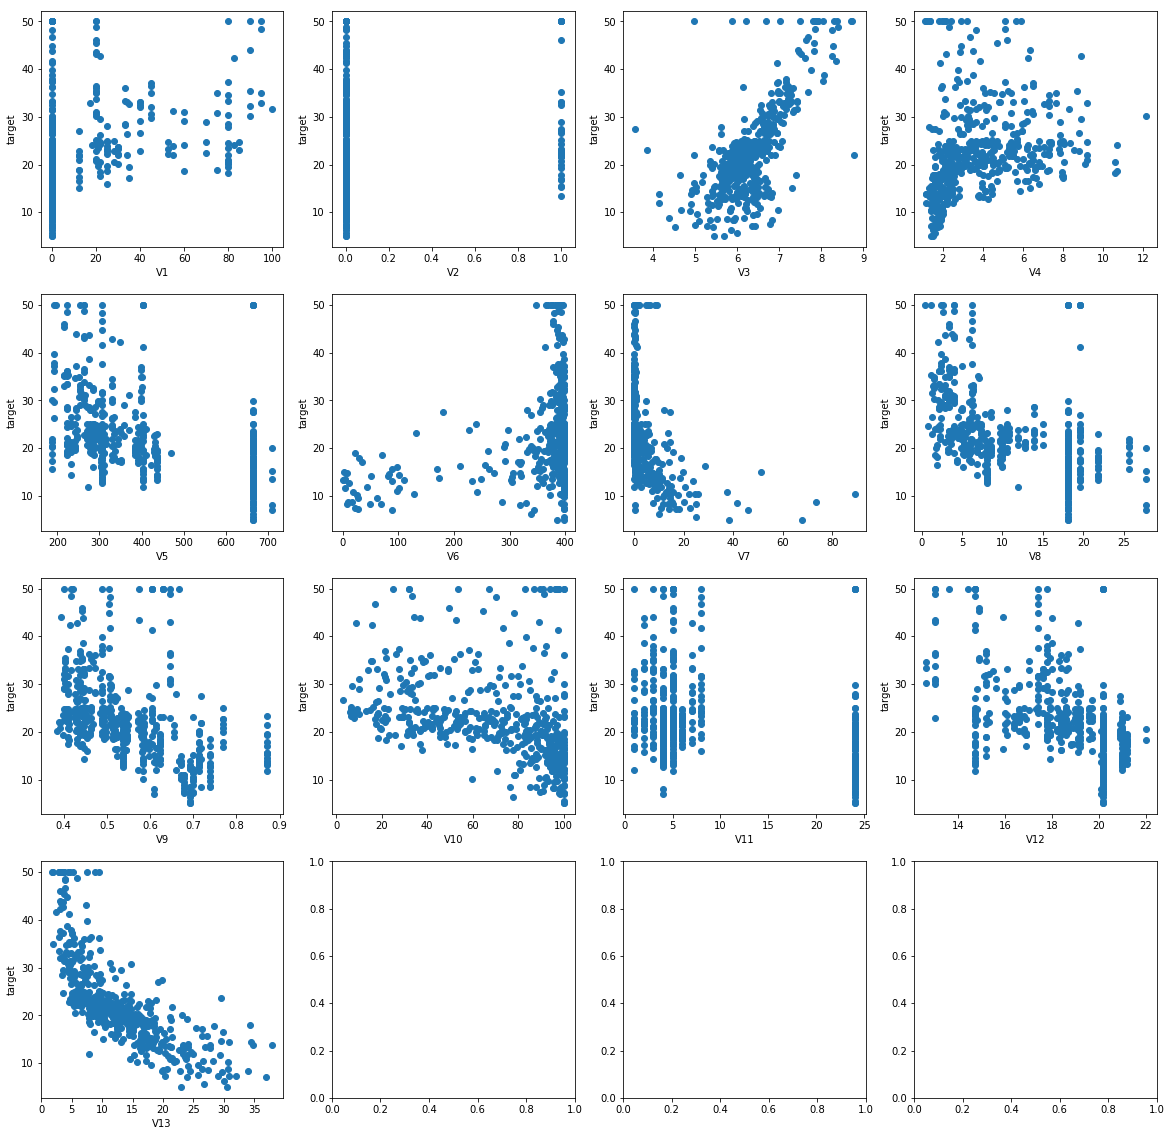

In [7]:
fig, (axes) = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
columns = list(data.columns)
aX = 0 # counting the ax
line_plot = 0 # counting the line in the plot
for column in columns:
    if (column != 'target'):
        x = data[column]
        y = data['target']
        ax = axes[line_plot, aX%4]
        ax.scatter(x,y)
        ax.set(xlabel = column, ylabel = 'target')
        if (aX%4 == 3):
            line_plot += 1
        aX += 1

Parece, a primeira vista, que V3, V7 e V13 podem ter uma correlaçao forte com 'target'

### Feature selection

Vamos tentar seleccionar as nossas features através de bibliotecas que nos ajudam a ver as correlaçoes entre variaveis

#### Correlation matrix

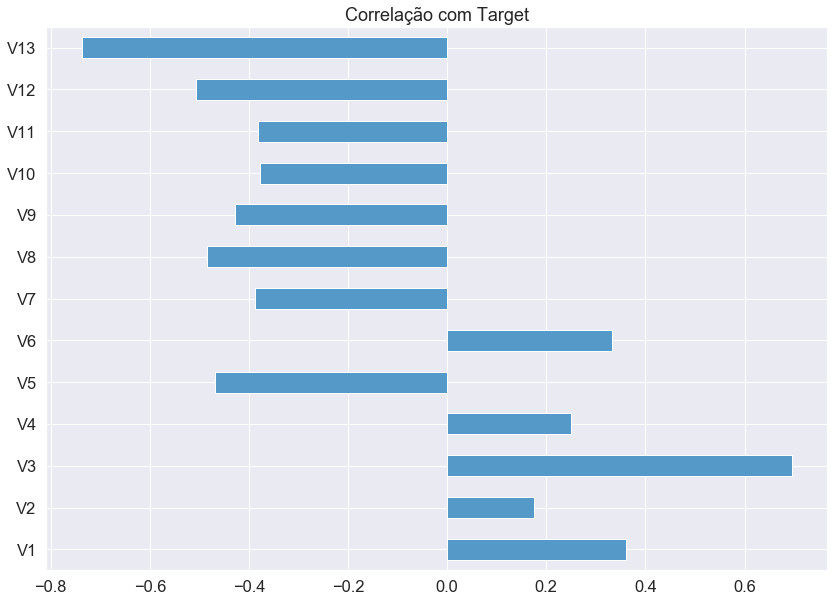

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn import metrics

# Calculando a matriz de correlação
corr = data.corr()

sns.set(font_scale=1.5)
#print(corr)
# Analisando as correlações de 'status' com as outras variáveis
c = corr['target'].drop('target')
c.plot(kind='barh', title = 'Correlação com Target', figsize = (14,10), color = '#5499C7', grid = True)

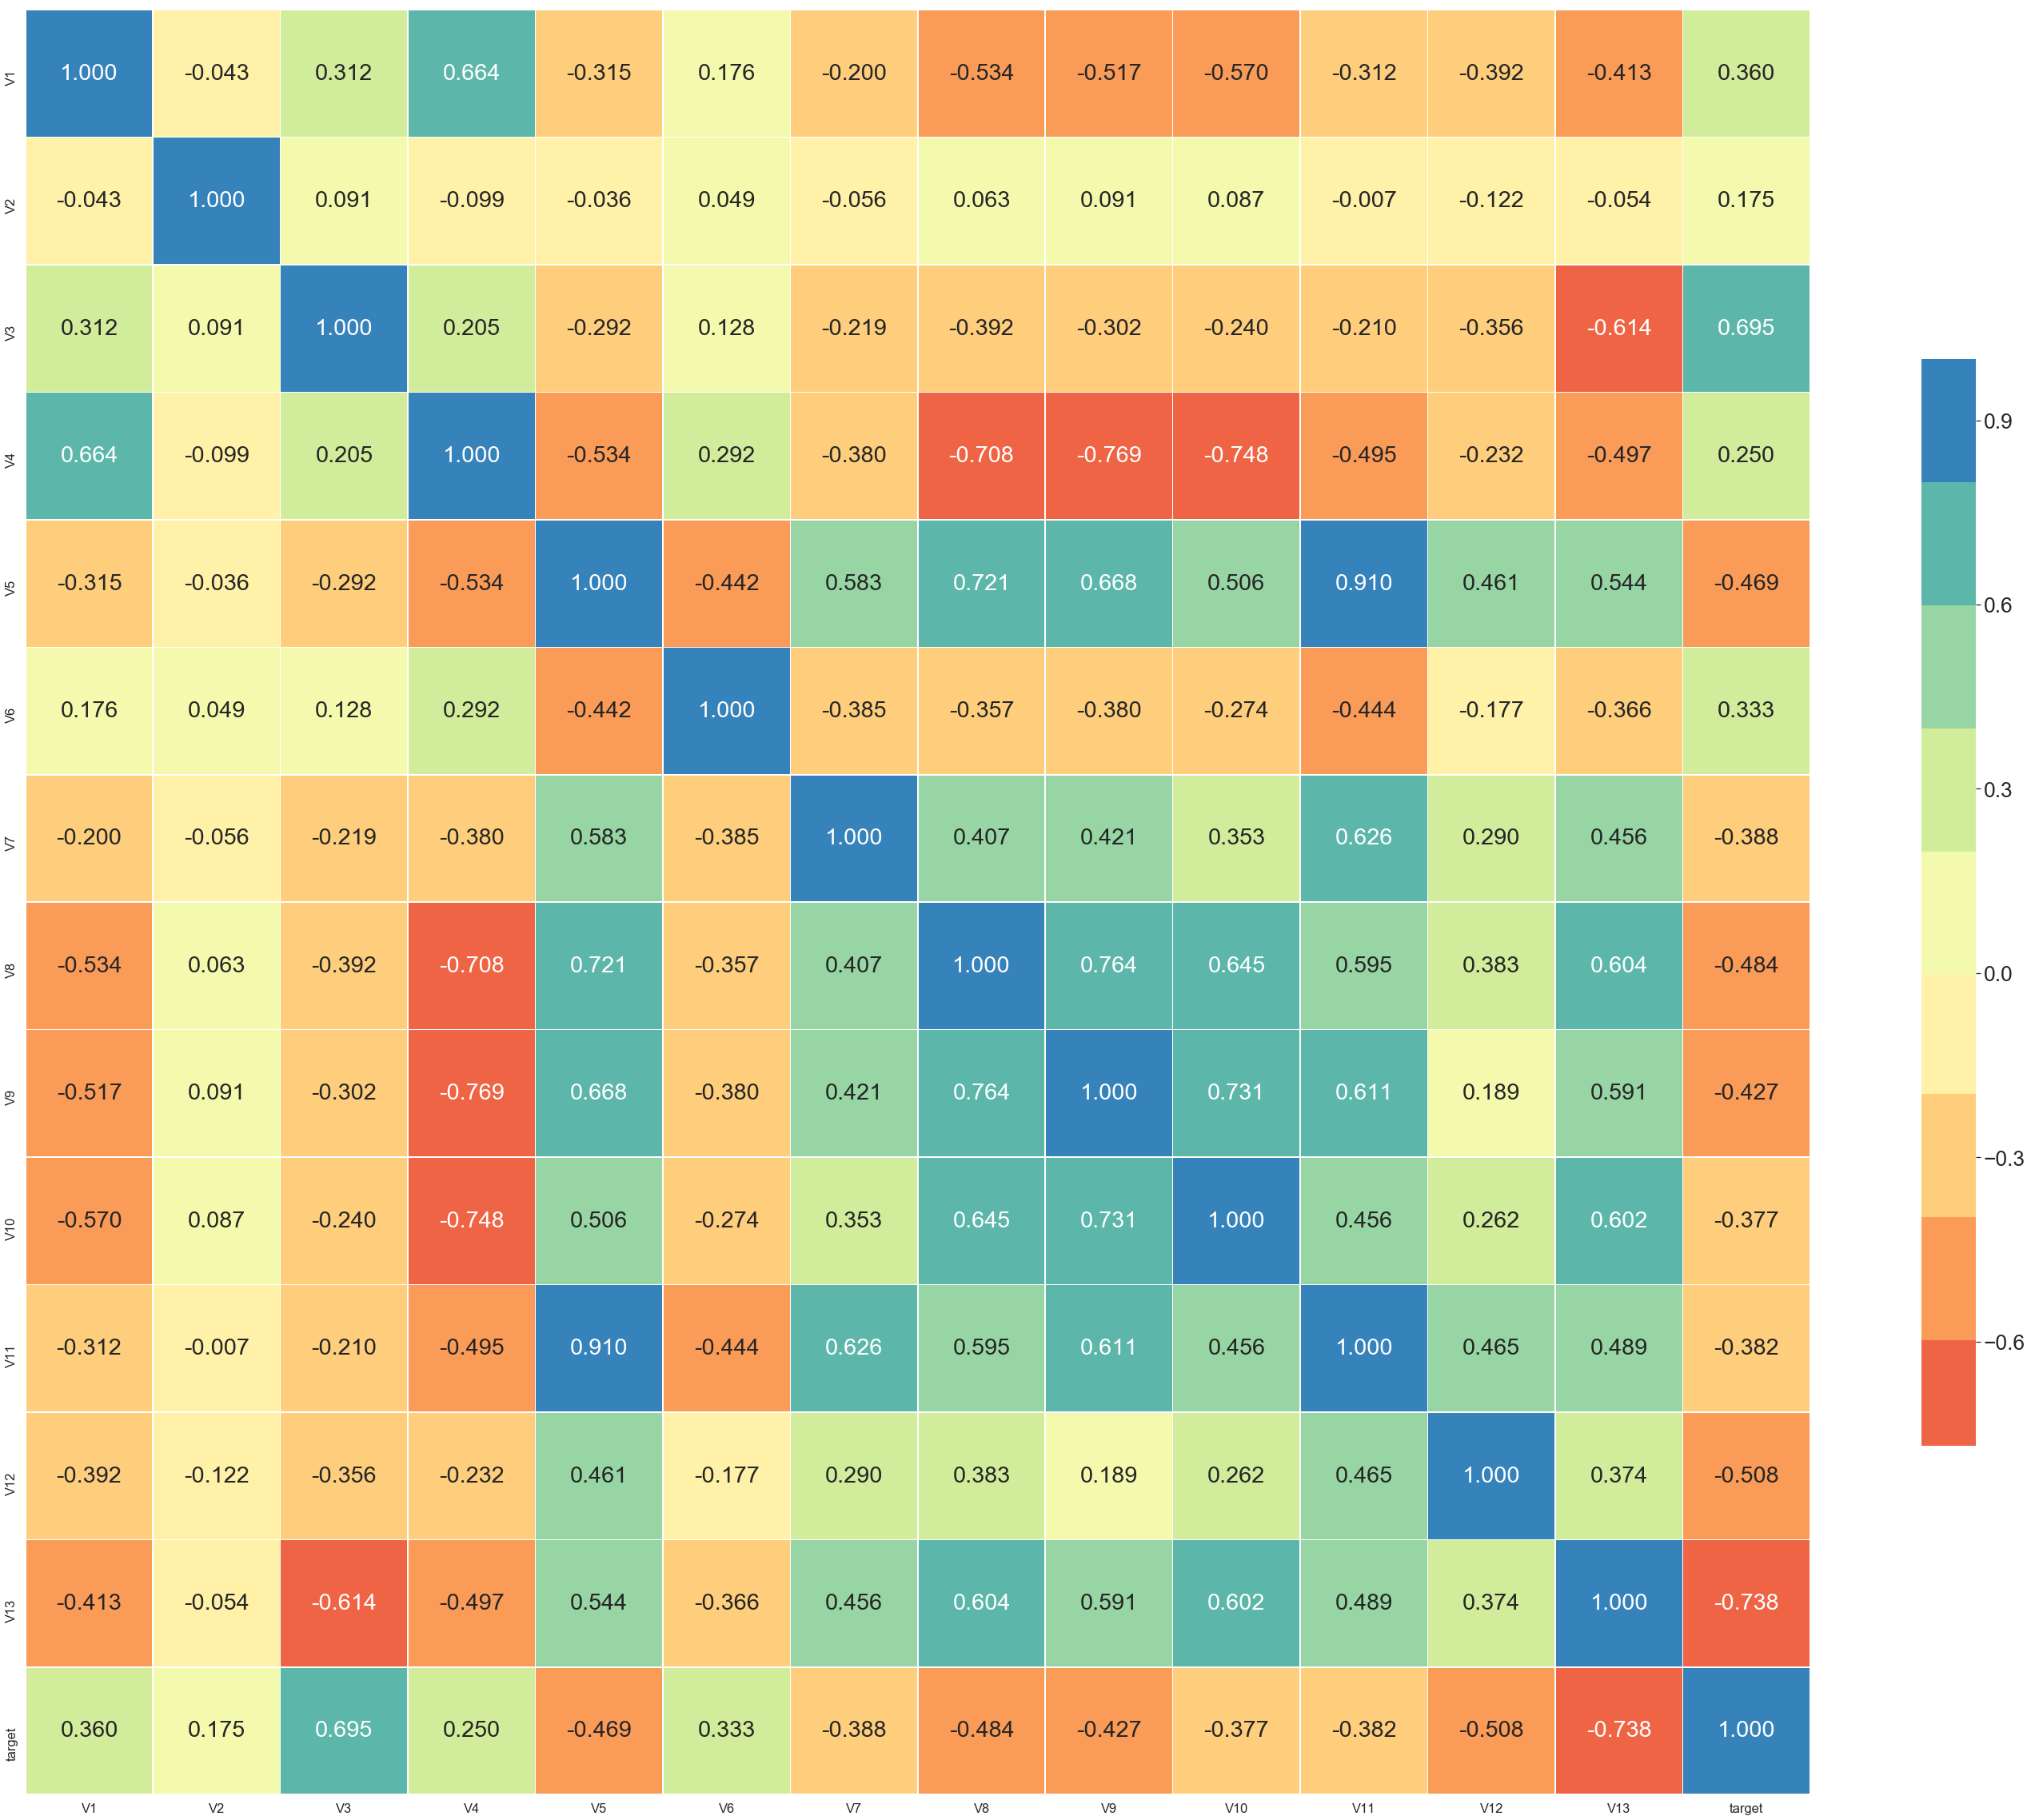

In [9]:
# Montando uma matriz de confusão com as correlações entre todas as variáveis
f, ax = plt.subplots(figsize=(50,50))
cmap = sns.color_palette("Spectral", 10)

sns.set(font_scale=2.4)

ax = sns.heatmap(corr, cmap=cmap, center=0, annot=True, fmt='.3f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

As variaveis com mais correlaçao positiva com o indicador 'target' parecem ser:
* V3
* V1 (porém < 0.5)
* V6 (porém < 0.5)

As variaveis com mais correlaçao negativa com o indicador 'target' parecem ser:
* V13
* V12
* V8
* V5
* V9

(Todas < -0.5)

#### Feature importance

/Users/andreamourelo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


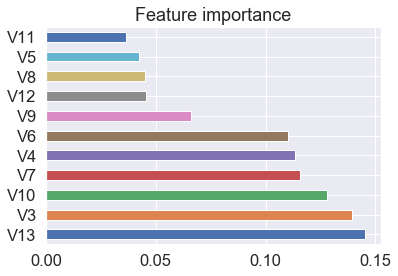

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
sns.set(font_scale=1.5)

X = data.drop('target',axis=1).iloc[:,1:]
y = data['target'].astype('int')
model = ExtraTreesClassifier()
model.fit(X,y)

# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh', title = 'Feature importance')
plt.show()

## Modelo 1
### Todas as features

In [11]:
# Dados que usaremos
predictors = list(data.columns)[0:13]
model1 = modeloRegressao(data,predictors)

Coefficients:      [ 4.80661422e-02  2.68006244e+00  3.95151715e+00 -1.45076094e+00
 -1.35667212e-02  9.60508350e-03 -1.06890546e-01  1.85672559e-02
 -1.83094430e+01 -6.87784744e-04  3.23260682e-01 -9.40983086e-01
 -4.68650246e-01]
Intercept:         35.117978633564036
Mean Absolute Error: 3.56
Mean Squared Error: 30.69
Root Mean Squared Error: 5.54
Root Mean Squared Error in Percentage: 3.35
Variance score:     0.69
Variance score (baseline): -0.06


## Modelo 2
### Todas as features com correlaçao positiva na correlation matrix

In [12]:
# Dados que usaremos
predictors = ['V1','V2','V3','V4','V6']
data_model2 = data[predictors + ['target']]
model2 = modeloRegressao(data_model2,predictors)

Coefficients:      [ 0.06534976  4.20616511  7.8925144  -0.10329373  0.02285881]
Intercept:         -35.99533569726274
Mean Absolute Error: 4.34
Mean Squared Error: 55.40
Root Mean Squared Error: 7.44
Root Mean Squared Error in Percentage: 4.50
Variance score:     0.44
Variance score (baseline): -0.06


## Modelo 3
### Todas as features com correlaçao negativa na correlation matrix

In [13]:
# Dados que usaremos
predictors = ['V5','V7','V8','V9','V10','V11','V12','V13']
data_model3 = data[predictors + ['target']]
model3 = modeloRegressao(data_model3,predictors)

Coefficients:      [ -0.01748172  -0.09982776   0.07923588 -14.55868485   0.06292838
   0.43809978  -1.38383107  -0.79128704]
Intercept:         64.2166096929916
Mean Absolute Error: 4.41
Mean Squared Error: 38.42
Root Mean Squared Error: 6.20
Root Mean Squared Error in Percentage: 3.75
Variance score:     0.61
Variance score (baseline): -0.06


## Modelo 4
### Todas as features com correlaçao de valor absoluto > 0.5 na correlation matrix

In [14]:
# Dados que usaremos
predictors = ['V3','V5','V8','V9','V12','V13']
data_model4 = data[predictors + ['target']]
model4 = modeloRegressao(data_model4,predictors)

Coefficients:      [ 4.73043432e+00 -3.52741626e-03  8.62001443e-02 -4.39584806e+00
 -9.32993814e-01 -4.89156265e-01]
Intercept:         19.037152374786622
Mean Absolute Error: 3.40
Mean Squared Error: 35.62
Root Mean Squared Error: 5.97
Root Mean Squared Error in Percentage: 3.61
Variance score:     0.64
Variance score (baseline): -0.06


## Modelo 5
### Todas as features com importância no metodo de feature importance

In [15]:
# Dados que usaremos
predictors = ['V13','V3','V10','V7','V4','V6','V9','V12','V8','V5','V11']
data_model5 = data[predictors + ['target']]
model5 = modeloRegressao(data_model5,predictors)

Coefficients:      [-4.64529090e-01  4.21031832e+00 -4.86476342e-03 -1.02842798e-01
 -1.19274834e+00  1.01362865e-02 -1.85735019e+01 -1.14611099e+00
  2.26575725e-02 -1.25941124e-02  3.28882672e-01]
Intercept:         36.70985169386589
Mean Absolute Error: 3.68
Mean Squared Error: 31.50
Root Mean Squared Error: 5.61
Root Mean Squared Error in Percentage: 3.39
Variance score:     0.68
Variance score (baseline): -0.06


In [16]:
# Com somente 5 delas
predictors = ['V13','V3','V10','V7','V4']
data_model5_2 = data[predictors + ['target']]
model5_2 = modeloRegressao(data_model5_2,predictors)

Coefficients:      [-0.56300979  5.23134506 -0.03134401 -0.12950083 -0.70329395]
Intercept:         1.9752886596164387
Mean Absolute Error: 3.53
Mean Squared Error: 32.92
Root Mean Squared Error: 5.74
Root Mean Squared Error in Percentage: 3.47
Variance score:     0.67
Variance score (baseline): -0.06


## Modelo 6 - Ridge Regression com as features do modelo 5

In [17]:
# Dados que usaremos
data_model6 = data_model5

dfTrain, dfTest = train_test_split(data_model6, test_size=0.1, random_state = seed_value)

X_train = np.array(dfTrain[predictors])
y_train = np.array(dfTrain['target'])

X_test = np.array(dfTest[predictors])
y_test = np.array(dfTest['target'])

# Create linear regression object
regr = sk.linear_model.Ridge(normalize=True, alpha=0.8)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print('Predictors:       ', predictors)

# The coefficients
print('Coefficients:     ', regr.coef_)
print('Intercept:        ', regr.intercept_)

# The mean squared error (MSE)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score:     %.2f' % r2_score(y_test, y_pred))

Predictors:        ['V13', 'V3', 'V10', 'V7', 'V4']
Coefficients:      [-0.32999148  3.56182089 -0.02300827 -0.10681122 -0.02607614]
Intercept:         6.248171181586024
Mean squared error: 49.80
Variance score:     0.50


=> Diminui a variance score ao penalizar as features

## Modelo 7 - Lasso Regression com as features do modelo 5

In [18]:
# Dados que usaremos
data_model7 = data_model5

dfTrain, dfTest = train_test_split(data_model7, test_size=0.1, random_state = seed_value)

X_train = np.array(dfTrain[predictors])
y_train = np.array(dfTrain['target'])

X_test = np.array(dfTest[predictors])
y_test = np.array(dfTest['target'])

# Create linear regression object
regr = sk.linear_model.Lasso(normalize=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print('Predictors:       ', predictors)

# The coefficients
print('Coefficients:     ', regr.coef_)
print('Intercept:        ', regr.intercept_)

# The mean squared error (MSE)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score:     %.2f' % r2_score(y_test, y_pred))

Predictors:        ['V13', 'V3', 'V10', 'V7', 'V4']
Coefficients:      [-0.  0. -0. -0.  0.]
Intercept:         22.28989010989011
Mean squared error: 104.83
Variance score:     -0.06


# Considerações finais